In [355]:
import pandas as pd
import numpy as np
import string

df = pd.read_csv('stage3.csv')
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

In [356]:
df.columns.values

array(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship',
       'participant_status', 'participant_type', 'sources',
       'state_house_district', 'state_senate_district'], dtype=object)

In [357]:
dropcols = ['participant_name', 'incident_id', 'address', 'city_or_county', 'incident_url', 'source_url', 'incident_url_fields_missing', 'latitude', 'longitude', 'sources', 'state_house_district', 'state_senate_district']
df = df.drop(labels=dropcols, axis=1)
df

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,location_description,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type
0,2013-01-01,Pennsylvania,0,4,14.0,NaN,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,NaN,NaN,Julian Sims under investigation: Four Shot and...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,2013-01-01,California,1,3,43.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,NaN,Four Shot; One Killed; Unidentified shooter in...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,2013-01-01,Ohio,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",Cotton Club,2.0,NaN,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,2013-01-05,Colorado,4,0,6.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",NaN,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,2013-01-07,North Carolina,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,2.0,Two firearms recovered. (Attempted) murder sui...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
5,2013-01-07,Oklahoma,4,0,1.0,NaN,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",Fairmont Terrace,NaN,NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
6,2013-01-19,New Mexico,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",NaN,2.0,NaN,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
7,2013-01-21,Louisiana,0,5,2.0,NaN,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,NaN,Unprovoked drive-by results in multiple teens ...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
8,2013-01-21,California,0,4,9.0,NaN,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,NaN,Perps were likely motivated by gang affliations,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
9,2013-01-23,Maryland,1,6,7.0,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",NaN,NaN,Shooting occurred over illegal dice game; vict...,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...


In [358]:
df = df.drop(labels=['notes', 'location_description', 'incident_characteristics'], axis=1)
df

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type
0,2013-01-01,Pennsylvania,0,4,14.0,NaN,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,2013-01-01,California,1,3,43.0,NaN,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,2013-01-01,Ohio,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,2013-01-05,Colorado,4,0,6.0,NaN,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,2013-01-07,North Carolina,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
5,2013-01-07,Oklahoma,4,0,1.0,NaN,NaN,NaN,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
6,2013-01-19,New Mexico,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
7,2013-01-21,Louisiana,0,5,2.0,NaN,NaN,NaN,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
8,2013-01-21,California,0,4,9.0,NaN,NaN,NaN,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
9,2013-01-23,Maryland,1,6,7.0,NaN,NaN,NaN,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...


In [359]:
inj = list(map(lambda x: x.lstrip(':' + string.digits), "0::Injured, Unharmed, Arrested||1::Unharmed".split('||')))
splits = list(map(lambda x: x.split(', '), inj))
splits

[['Injured', 'Unharmed', 'Arrested'], ['Unharmed']]

In [360]:
import string
def split_par_status(col_val, select):
    status = {"Unharmed": 0, "Injured": 0, "Killed": 0, "Arrested": 0}
    if col_val == "": 
        return ""
    clean_strings = list(map(lambda x: x.lstrip(':' + string.digits), col_val.split('||')))
    subsplits = list(map(lambda x: x.split(', '), clean_strings))
    for participant in subsplits:
        for par_status in participant:
            status[par_status] += 1
    return status[select]

In [361]:
split_par_status("0::Injured, Unharmed, Arrested||1::Unharmed", "Unharmed")

2

In [362]:
inj = list(map(lambda x: x[3:], "0::Victim||1::Subject-Suspect".split('||')))
splits = list(map(lambda x: x.split(', '), inj))
splits

[['Victim'], ['Subject-Suspect']]

In [363]:
def split_par_type(col_val):
    if col_val == "NaN": 
        return "NaN"
    types = {"Victim": 0, "Subject-Suspect": 0}
    clean_strings = list(map(lambda x: x.lstrip(':' + string.digits), col_val.split('||')))
    subsplits = list(map(lambda x: x.split(', '), clean_strings))
    for participant in subsplits:
        for par_type in participant:
            types[par_type] += 1
    return types

In [364]:
split_par_type("0::Victim||1::Subject-Suspect")

{'Victim': 1, 'Subject-Suspect': 1}

In [365]:
def split_par_gender(col_val):
    if col_val == "NaN": 
        return "NaN"
    genders = {"Male": 0, "Female": 0}
    clean_strings = list(map(lambda x: x.lstrip(':' + string.digits), col_val.split('||')))
    subsplits = list(map(lambda x: x.split(', '), clean_strings))
    for participant in subsplits:
        for par_gender in participant:
            genders[par_gender] += 1
    return genders

In [366]:
split_par_gender("0::Male||1::Male||3::Male||4::Female")

{'Male': 3, 'Female': 1}

In [367]:
df['date'] = df['date'].apply(lambda x: x.replace('-', ''))
df.head()

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type
0,20130101,Pennsylvania,0,4,14.0,NaN,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,20130101,California,1,3,43.0,NaN,NaN,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,20130101,Ohio,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,20130105,Colorado,4,0,6.0,NaN,NaN,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,20130107,North Carolina,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [368]:
df = df.replace(np.nan, '', regex=True)

In [369]:
df['Unharmed'] = df['participant_status'].apply(lambda x: x.count('Unharmed'))
df['Injured'] = df['participant_status'].apply(lambda x: x.count('Injured'))
df['Killed'] = df['participant_status'].apply(lambda x: x.count('Killed'))
df['Arrested'] = df['participant_status'].apply(lambda x: x.count('Arrested'))
df.head()

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,Unharmed,Injured,Killed,Arrested
0,20130101,Pennsylvania,0,4,14,,,,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,0,4,0,1
1,20130101,California,1,3,43,,,,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,0,3,1,0
2,20130101,Ohio,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2,3,1,2
3,20130105,Colorado,4,0,6,,,,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,0,0,4,0
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,0,2,2,0


In [370]:
df['Males'] = df['participant_gender'].apply(lambda x: x.count('Male'))
df['Females'] = df['participant_gender'].apply(lambda x: x.count('Female'))
df.head()

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,Unharmed,Injured,Killed,Arrested,Males,Females
0,20130101,Pennsylvania,0,4,14,,,,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,0,4,0,1,3,1
1,20130101,California,1,3,43,,,,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,0,3,1,0,1,0
2,20130101,Ohio,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2,3,1,2,5,0
3,20130105,Colorado,4,0,6,,,,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,0,0,4,0,3,1
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,0,2,2,0,2,2


In [371]:
df['Victims'] = df['participant_type'].apply(lambda x: x.count('Victim'))
df['Suspects'] = df['participant_type'].apply(lambda x: x.count('Subject-Suspect'))
df.head()

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,...,participant_status,participant_type,Unharmed,Injured,Killed,Arrested,Males,Females,Victims,Suspects
0,20130101,Pennsylvania,0,4,14,,,,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,0,4,0,1,3,1,4,1
1,20130101,California,1,3,43,,,,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,0,3,1,0,1,0,4,1
2,20130101,Ohio,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2,3,1,2,5,0,3,2
3,20130105,Colorado,4,0,6,,,,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,0,0,4,0,3,1,3,1
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,0,2,2,0,2,2,3,1


In [372]:
df['Adults'] = df['participant_age_group'].apply(lambda x: x.count('Adult'))
df['Teens'] = df['participant_age_group'].apply(lambda x: x.count('Teen'))
df['Children'] = df['participant_age_group'].apply(lambda x: x.count('Child'))
df.head()

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_age,participant_age_group,...,Injured,Killed,Arrested,Males,Females,Victims,Suspects,Adults,Teens,Children
0,20130101,Pennsylvania,0,4,14,,,,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,...,4,0,1,3,1,4,1,5,0,0
1,20130101,California,1,3,43,,,,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,...,3,1,0,1,0,4,1,4,0,0
2,20130101,Ohio,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,...,3,1,2,5,0,3,2,5,0,0
3,20130105,Colorado,4,0,6,,,,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,...,0,4,0,3,1,3,1,4,0,0
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,...,2,2,0,2,2,3,1,3,1,0


In [373]:
guns = df.gun_type.unique()
for entry in guns:
    print(entry)


0::Unknown||1::Unknown
0::Handgun||1::Handgun
0::22 LR||1::223 Rem [AR-15]
0::Unknown
0::Shotgun
0::Handgun
0::9mm
0::45 Auto
0::12 gauge
0::7.62 [AK-47]
0::9mm||1::9mm||2::40 SW||3::40 SW
0::40 SW||1::Shotgun
0::7.62 [AK-47]||1::40 SW||2::9mm
0::9mm||1::45 Auto
0::44 Mag
0::223 Rem [AR-15]||1::44 Mag
0::Other
0::40 SW
0::38 Spl
0::Handgun||1::Handgun||2::Handgun
0::22 LR
0::380 Auto
0::9mm||1::40 SW
0::22 LR||1::410 gauge||2::32 Auto
0::9mm||1::Shotgun
0::308 Win
0::Other||1::Other
0::Rifle
0::357 Mag
0::22 LR||1::Rifle
0::Handgun||1::Rifle
0::16 gauge
0::40 SW||1::357 Mag
0::9mm||1::Unknown
0::Unknown||1::Unknown||2::Unknown||3::Unknown
0::38 Spl||1::9mm
0::30-30 Win
0::25 Auto||1::38 Spl||2::32 Auto||3::22 LR
0::9mm||1::45 Auto||2::12 gauge||3::22 LR
0::Shotgun||1::30-30 Win
0::Shotgun||1::Handgun
0::410 gauge
0::Unknown||1::Unknown||2::Unknown
0::Rifle||1::Handgun||2::45 Auto||3::40 SW||4::38 Spl||5::9mm
0::38 Spl||1::40 SW
0::223 Rem [AR-15]
0::32 Auto
0::Rifle||1::Handgun
0::45 

0::223 Rem [AR-15]||1::30-30 Win||2::Rifle
0::Handgun||1::Handgun||2::Handgun||3::Handgun||4::Shotgun||5::223 Rem [AR-15]||6::7.62 [AK-47]
0::Rifle||1::Shotgun||2::Handgun||3::Handgun||4::Handgun||5::Handgun||6::Handgun||7::Handgun||8::Handgun||9::Handgun||10::Handgun||11::Handgun||12::Handgun||13::Handgun||14::Handgun
0::223 Rem [AR-15]||1::Unknown||2::22 LR
0::Handgun||1::Handgun||2::Handgun||3::Shotgun||4::Shotgun||5::Shotgun||6::Rifle||7::Rifle||8::Rifle||9::Rifle||10::Rifle||11::Rifle||12::Rifle||13::Rifle
0::45 Auto||1::45 Auto||2::45 Auto||3::45 Auto||4::45 Auto||5::45 Auto||6::45 Auto||7::45 Auto||8::45 Auto||9::45 Auto
0::Shotgun||1::30-06 Spr
0::9mm||1::380 Auto||2::357 Mag||3::45 Auto
0::223 Rem [AR-15]||1::Shotgun||2::Shotgun
0::223 Rem [AR-15]||1::223 Rem [AR-15]||2::223 Rem [AR-15]||3::223 Rem [AR-15]||4::223 Rem [AR-15]||5::223 Rem [AR-15]||6::223 Rem [AR-15]
0::9mm||1::40 SW||2::Handgun
0::Other||1::12 gauge||2::Other||3::357 Mag
0::Shotgun||1::12 gauge
0::40 SW||1::32 

In [374]:
test = list(filter(lambda x: x != '', guns[1].split('|')))
list(map(lambda x: x.lstrip(string.digits).lstrip(':'), test))

['Unknown', 'Unknown']

In [375]:
gun_types = {}
for entry in guns:
    splits = list(filter(lambda x: x != '', entry.split('|')))
    cleans = list(map(lambda x: x.lstrip(string.digits).lstrip(':'), splits))
    for clean in cleans:
        if clean in gun_types:
            gun_types[clean] += 1
        else:
            gun_types[clean] = 1
gun_types

{'Unknown': 12954,
 'Handgun': 4365,
 '22 LR': 649,
 '223 Rem [AR-15]': 777,
 'Shotgun': 1084,
 '9mm': 820,
 '45 Auto': 434,
 '12 gauge': 452,
 '7.62 [AK-47]': 367,
 '40 SW': 384,
 '44 Mag': 71,
 'Other': 417,
 '38 Spl': 267,
 '380 Auto': 284,
 '410 gauge': 46,
 '32 Auto': 76,
 '308 Win': 68,
 'Rifle': 2170,
 '357 Mag': 199,
 '16 gauge': 23,
 '30-30 Win': 65,
 '25 Auto': 94,
 '20 gauge': 102,
 '10mm': 17,
 '30-06 Spr': 52,
 '300 Win': 17,
 '28 gauge': 5}

In [376]:
handguns = ['Handgun', '9mm', '45 Auto', '40 SW', '44 Mag', '38 Spl', '380 Auto', '32 Auto', '357 Mag', '25 Auto', '10mm']
rifles = ['223 Rem [AR-15]', '22 LR', '7.62 [AK-47]', 'Rifle', '30-30 Win', '30-06 Spr', '300 Win']
shotguns = ['Shotgun', '12 gauge', '410 gauge', '16 gauge', '20 gauge', '28 gauge']

In [377]:
df = df.drop(['participant_age', 'participant_age_group', 'participant_gender'], axis=1)
df.head()

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_relationship,participant_status,...,Injured,Killed,Arrested,Males,Females,Victims,Suspects,Adults,Teens,Children
0,20130101,Pennsylvania,0,4,14,,,,,0::Arrested||1::Injured||2::Injured||3::Injure...,...,4,0,1,3,1,4,1,5,0,0
1,20130101,California,1,3,43,,,,,0::Killed||1::Injured||2::Injured||3::Injured,...,3,1,0,1,0,4,1,4,0,0
2,20130101,Ohio,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2,,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",...,3,1,2,5,0,3,2,5,0,0
3,20130105,Colorado,4,0,6,,,,,0::Killed||1::Killed||2::Killed||3::Killed,...,0,4,0,3,1,3,1,4,0,0
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,...,2,2,0,2,2,3,1,3,1,0


In [378]:
df['Handguns'] = df['gun_type'].apply(lambda x: sum([x.count(g_type) for g_type in handguns]))
df['Rifles'] = df['gun_type'].apply(lambda x: sum([x.count(g_type) for g_type in rifles]))
df['Shotguns'] = df['gun_type'].apply(lambda x: sum([x.count(g_type) for g_type in shotguns]))
df

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_relationship,participant_status,...,Males,Females,Victims,Suspects,Adults,Teens,Children,Handguns,Rifles,Shotguns
0,20130101,Pennsylvania,0,4,14,,,,,0::Arrested||1::Injured||2::Injured||3::Injure...,...,3,1,4,1,5,0,0,0,0,0
1,20130101,California,1,3,43,,,,,0::Killed||1::Injured||2::Injured||3::Injured,...,1,0,4,1,4,0,0,0,0,0
2,20130101,Ohio,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2,,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",...,5,0,3,2,5,0,0,0,0,0
3,20130105,Colorado,4,0,6,,,,,0::Killed||1::Killed||2::Killed||3::Killed,...,3,1,3,1,4,0,0,0,0,0
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,...,2,2,3,1,3,1,0,2,0,0
5,20130107,Oklahoma,4,0,1,,,,,0::Killed||1::Killed||2::Killed||3::Killed||4:...,...,2,4,4,2,6,0,0,0,0,0
6,20130119,New Mexico,5,0,1,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],2,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,...,3,3,5,1,2,1,3,0,2,0
7,20130121,Louisiana,0,5,2,,,,,0::Injured||1::Injured||2::Injured||3::Injured...,...,5,0,5,1,0,0,0,0,0,0
8,20130121,California,0,4,9,,,,,0::Injured||1::Injured||2::Injured||3::Injured...,...,5,0,4,1,1,3,0,0,0,0
9,20130123,Maryland,1,6,7,,,,,0::Killed||1::Injured||2::Injured||3::Injured|...,...,1,0,7,0,6,1,0,0,0,0


In [379]:
df['% Male'] = (df['Males'] / (df['Males'] + df['Females']))
df['People'] = (df['Victims'] + df['Suspects'])
df['Lethality'] = (df['Killed'] / df['People'])

In [380]:
sf = df.dropna(subset=['n_guns_involved'])
sf

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,n_guns_involved,participant_relationship,participant_status,...,Suspects,Adults,Teens,Children,Handguns,Rifles,Shotguns,% Male,People,Lethality
0,20130101,Pennsylvania,0,4,14,,,,,0::Arrested||1::Injured||2::Injured||3::Injure...,...,1,5,0,0,0,0,0,0.750000,5,0.000000
1,20130101,California,1,3,43,,,,,0::Killed||1::Injured||2::Injured||3::Injured,...,1,4,0,0,0,0,0,1.000000,5,0.200000
2,20130101,Ohio,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2,,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",...,2,5,0,0,0,0,0,1.000000,5,0.200000
3,20130105,Colorado,4,0,6,,,,,0::Killed||1::Killed||2::Killed||3::Killed,...,1,4,0,0,0,0,0,0.750000,4,1.000000
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,...,1,3,1,0,2,0,0,0.500000,4,0.500000
5,20130107,Oklahoma,4,0,1,,,,,0::Killed||1::Killed||2::Killed||3::Killed||4:...,...,2,6,0,0,0,0,0,0.333333,6,0.666667
6,20130119,New Mexico,5,0,1,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],2,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,...,1,2,1,3,0,2,0,0.500000,6,0.833333
7,20130121,Louisiana,0,5,2,,,,,0::Injured||1::Injured||2::Injured||3::Injured...,...,1,0,0,0,0,0,0,1.000000,6,0.000000
8,20130121,California,0,4,9,,,,,0::Injured||1::Injured||2::Injured||3::Injured...,...,1,1,3,0,0,0,0,1.000000,5,0.000000
9,20130123,Maryland,1,6,7,,,,,0::Killed||1::Injured||2::Injured||3::Injured|...,...,0,6,1,0,0,0,0,1.000000,7,0.142857


In [381]:
sf['n_guns_involved'] = sf['n_guns_involved'].replace('', np.nan)
sf = sf.dropna(subset=['n_guns_involved'])
sf.loc[:, 'n_guns_involved'] = sf['n_guns_involved'].apply(lambda x: int(x))
sf.rename(columns={'n_guns_involved': 'Total Guns'}, inplace=True)
sf

/Users/lvreynoso/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/lvreynoso/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,Total Guns,participant_relationship,participant_status,...,Suspects,Adults,Teens,Children,Handguns,Rifles,Shotguns,% Male,People,Lethality
2,20130101,Ohio,1,3,9,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2,,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",...,2,5,0,0,0,0,0,1.000000,5,0.200000
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,...,1,3,1,0,2,0,0,0.500000,4,0.500000
6,20130119,New Mexico,5,0,1,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],2,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,...,1,2,1,3,0,2,0,0.500000,6,0.833333
10,20130123,Tennessee,1,3,3,0::Unknown,0::Unknown,1,,0::Killed||1::Injured||2::Injured||3::Injured,...,1,1,0,0,0,0,0,1.000000,5,0.200000
11,20130125,Missouri,1,3,1,0::Unknown,0::Unknown,1,,0::Killed||1::Injured||2::Injured||3::Injured,...,1,1,0,0,0,0,0,1.000000,5,0.200000
12,20130126,Louisiana,2,3,3,0::Unknown,0::Shotgun,1,,0::Killed||1::Injured||2::Injured||3::Killed||...,...,1,5,0,0,0,0,1,1.000000,5,0.400000
13,20130126,District of Columbia,0,5,1,0::Unknown,0::Handgun,1,,0::Injured||1::Injured||2::Injured||3::Injured...,...,1,6,0,0,1,0,0,0.666667,6,0.000000
15,20130202,Tennessee,0,5,9,0::Unknown,0::Handgun,1,,0::Injured||1::Injured||2::Injured||3::Injured...,...,1,5,0,0,1,0,0,0.000000,6,0.000000
16,20130203,California,1,3,3,0::Unknown,0::9mm,1,4::Drive by - Random victims||5::Drive by - Ra...,0::Killed||1::Injured||2::Injured||3::Injured|...,...,3,7,0,0,1,0,0,0.833333,7,0.142857
18,20130209,Louisiana,0,4,2,0::Unknown,0::Handgun,1,,0::Injured||1::Injured||2::Injured||3::Injured...,...,3,7,0,0,1,0,0,0.714286,7,0.000000


In [382]:
# gun frames
# drop rows without gun types
gf = sf.drop(sf[(sf.Handguns == 0) & (sf.Rifles == 0) & (sf.Shotguns == 0)].index)
gf

,date,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,Total Guns,participant_relationship,participant_status,...,Suspects,Adults,Teens,Children,Handguns,Rifles,Shotguns,% Male,People,Lethality
4,20130107,North Carolina,2,2,6,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,...,1,3,1,0,2,0,0,0.500000,4,0.500000
6,20130119,New Mexico,5,0,1,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],2,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,...,1,2,1,3,0,2,0,0.500000,6,0.833333
12,20130126,Louisiana,2,3,3,0::Unknown,0::Shotgun,1,,0::Killed||1::Injured||2::Injured||3::Killed||...,...,1,5,0,0,0,0,1,1.000000,5,0.400000
13,20130126,District of Columbia,0,5,1,0::Unknown,0::Handgun,1,,0::Injured||1::Injured||2::Injured||3::Injured...,...,1,6,0,0,1,0,0,0.666667,6,0.000000
15,20130202,Tennessee,0,5,9,0::Unknown,0::Handgun,1,,0::Injured||1::Injured||2::Injured||3::Injured...,...,1,5,0,0,1,0,0,0.000000,6,0.000000
16,20130203,California,1,3,3,0::Unknown,0::9mm,1,4::Drive by - Random victims||5::Drive by - Ra...,0::Killed||1::Injured||2::Injured||3::Injured|...,...,3,7,0,0,1,0,0,0.833333,7,0.142857
18,20130209,Louisiana,0,4,2,0::Unknown,0::Handgun,1,,0::Injured||1::Injured||2::Injured||3::Injured...,...,3,7,0,0,1,0,0,0.714286,7,0.000000
20,20130211,Delaware,3,2,1,0::Unknown,0::45 Auto,1,,0::Killed||1::Killed||2::Injured||3::Injured||...,...,1,5,0,0,1,0,0,0.600000,5,0.600000
22,20130219,California,4,3,46,0::Unknown,0::12 gauge,1,,0::Killed||1::Injured||2::Injured||3::Injured|...,...,1,7,0,0,0,0,1,0.750000,7,0.571429
28,20130303,Georgia,2,2,8,0::Unknown,0::7.62 [AK-47],1,,0::Killed||1::Killed||2::Injured||3::Injured||...,...,2,6,0,0,0,1,0,0.833333,6,0.333333


In [383]:
gf = gf.drop(labels=['date', 'state', 'n_killed', 'n_injured', 'congressional_district', 'gun_stolen', 'gun_type', 'participant_relationship', 'participant_status', 'participant_type'], axis=1)
gf

,Total Guns,Unharmed,Injured,Killed,Arrested,Males,Females,Victims,Suspects,Adults,Teens,Children,Handguns,Rifles,Shotguns,% Male,People,Lethality
4,2,0,2,2,0,2,2,3,1,3,1,0,2,0,0,0.500000,4,0.500000
6,2,1,0,5,1,3,3,5,1,2,1,3,0,2,0,0.500000,6,0.833333
12,1,0,3,2,1,5,0,4,1,5,0,0,0,0,1,1.000000,5,0.400000
13,1,1,5,0,0,4,2,5,1,6,0,0,1,0,0,0.666667,6,0.000000
15,1,1,5,0,1,0,6,5,1,5,0,0,1,0,0,0.000000,6,0.000000
16,1,3,3,1,3,5,1,4,3,7,0,0,1,0,0,0.833333,7,0.142857
18,1,3,4,0,3,5,2,4,3,7,0,0,1,0,0,0.714286,7,0.000000
20,1,0,2,3,0,3,2,4,1,5,0,0,1,0,0,0.600000,5,0.600000
22,1,0,3,4,0,3,1,6,1,7,0,0,0,0,1,0.750000,7,0.571429
28,1,2,2,2,2,5,1,4,2,6,0,0,0,1,0,0.833333,6,0.333333


In [384]:
gf.shape

(41708, 18)

In [385]:
df.shape

(239677, 28)

In [386]:
### comparing gun types with casualties

from sklearn.model_selection import train_test_split

X = gf[['Handguns', 'Rifles', 'Shotguns']]
y = gf[['Victims']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [387]:
### unscaled data

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[[-0.02071185 -0.01517994 -0.01475434]]
[0.44835398]


In [388]:
print(r2_score(y_test, model.predict(X_test)))

0.002562757289481077


In [389]:
print(mean_squared_error(y_test, model.predict(X_test)))

0.7168833986212854


In [390]:
### scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

In [391]:
s_model = LinearRegression()
s_model.fit(scaled_X, y_train)
print(s_model.coef_)
print(s_model.intercept_)

[[-0.0324145  -0.01341554 -0.00722853]]
[0.42082548]


In [392]:
print(r2_score(y_test, s_model.predict(scaled_test_X)))

0.002562757289480855


In [393]:
print(mean_squared_error(y_test, s_model.predict(X_test)))

0.7188901931497448


In [394]:
### adding number of suspects

X = gf[['Handguns', 'Rifles', 'Shotguns', 'Suspects']]
y = gf[['Victims']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

sus_model = LinearRegression()
sus_model.fit(scaled_X, y_train)
print(sus_model.coef_)
print(sus_model.intercept_)
print(r2_score(y_test, sus_model.predict(scaled_test_X)))
print(mean_squared_error(y_test, sus_model.predict(X_test)))

[[-0.0436606  -0.01783688 -0.0073544   0.04315295]]
[0.41729748]
0.0017006232637538643
0.9547044021690192


In [395]:
gf['% Male'].unique()

array([0.5       , 1.        , 0.66666667, 0.        , 0.83333333,
       0.71428571, 0.6       , 0.75      , 0.8       , 0.64705882,
       0.4       , 0.63636364, 0.57142857,        nan, 0.33333333,
       0.875     , 0.85714286, 0.6875    , 0.25      , 0.2       ,
       0.42857143, 0.55555556, 0.375     , 0.7       , 0.625     ,
       0.81818182, 0.9       , 0.84615385, 0.90909091, 0.84210526,
       0.58333333, 0.46666667, 0.73684211, 0.77777778, 0.88888889,
       0.52173913, 0.72727273, 0.91666667, 0.86666667, 0.95238095,
       0.78205128, 0.8125    , 0.91304348, 0.65      , 0.14285714,
       0.54545455, 0.76470588, 0.69565217, 0.68421053, 0.44444444,
       0.45238095, 0.73333333, 0.48571429])

In [396]:
### comparing gender

gen_f = gf.dropna(subset=['% Male'])

X = gen_f[['% Male']]
y = gen_f[['Victims']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

gen_model = LinearRegression()
gen_model.fit(scaled_X, y_train)
print(gen_model.coef_)
print(gen_model.intercept_)
print(r2_score(y_test, gen_model.predict(scaled_test_X)))
print(mean_squared_error(y_test, gen_model.predict(X_test)))

[[-0.16111924]]
[0.49026092]
0.029032352559030916
0.9442941603978059


In [397]:
gf.Lethality.unique()

array([0.5       , 0.83333333, 0.4       , 0.        , 0.14285714,
       0.6       , 0.57142857, 0.33333333, 0.16666667, 0.75      ,
       0.8       , 1.        , 0.28571429, 0.85714286, 0.25      ,
       0.375     , 0.42857143, 0.6875    , 0.2       , 0.22222222,
              nan, 0.66666667, 0.11111111, 0.18181818, 0.08333333,
       0.71428571, 0.875     , 0.125     , 0.88888889, 0.09090909,
       0.9       , 0.15789474, 0.1       , 0.52631579, 0.23076923,
       0.43243243, 0.48543689, 0.3125    , 0.41666667, 0.57446809,
       0.11764706, 0.48571429])

In [398]:
### lethality vs gun type
leth_f = gf.replace(np.nan, 0)
leth_f = leth_f.replace([np.inf, -np.inf], np.nan)
leth_f = leth_f.dropna(subset=['Lethality'])

X = leth_f[['Handguns', 'Rifles', 'Shotguns']]
y = leth_f[['Lethality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
leth_scaler = StandardScaler()
scaled_X = leth_scaler.fit_transform(X_train)
scaled_test_X = leth_scaler.transform(X_test)

leth_model = LinearRegression()
leth_model.fit(scaled_X, y_train)
print(leth_model.coef_)
print(leth_model.intercept_)
print(r2_score(y_test, leth_model.predict(scaled_test_X)))
print(mean_squared_error(y_test, leth_model.predict(X_test)))

[[-1.11689705e-02 -4.61497535e-03 -9.28244981e-05]]
[0.07895182]
0.001228720138732542
0.04799081833051105


In [405]:
### lethality vs age group
leth_f = gf.replace(np.nan, 0)
leth_f = leth_f.replace([np.inf, -np.inf], np.nan)
leth_f = leth_f.dropna(subset=['Lethality'])

X = leth_f[['Adults', 'Teens', 'Children']]
y = leth_f[['Lethality']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
leth_scaler = StandardScaler()
scaled_X = leth_scaler.fit_transform(X_train)
scaled_test_X = leth_scaler.transform(X_test)

leth_model = LinearRegression()
leth_model.fit(scaled_X, y_train)
print(leth_model.coef_)
print(leth_model.intercept_)
print(r2_score(y_test, leth_model.predict(scaled_test_X)))
print(mean_squared_error(y_test, leth_model.predict(X_test)))

[[0.02424472 0.00437908 0.01643222]]
[0.07604005]
0.0223240474820231
0.05265516037464887


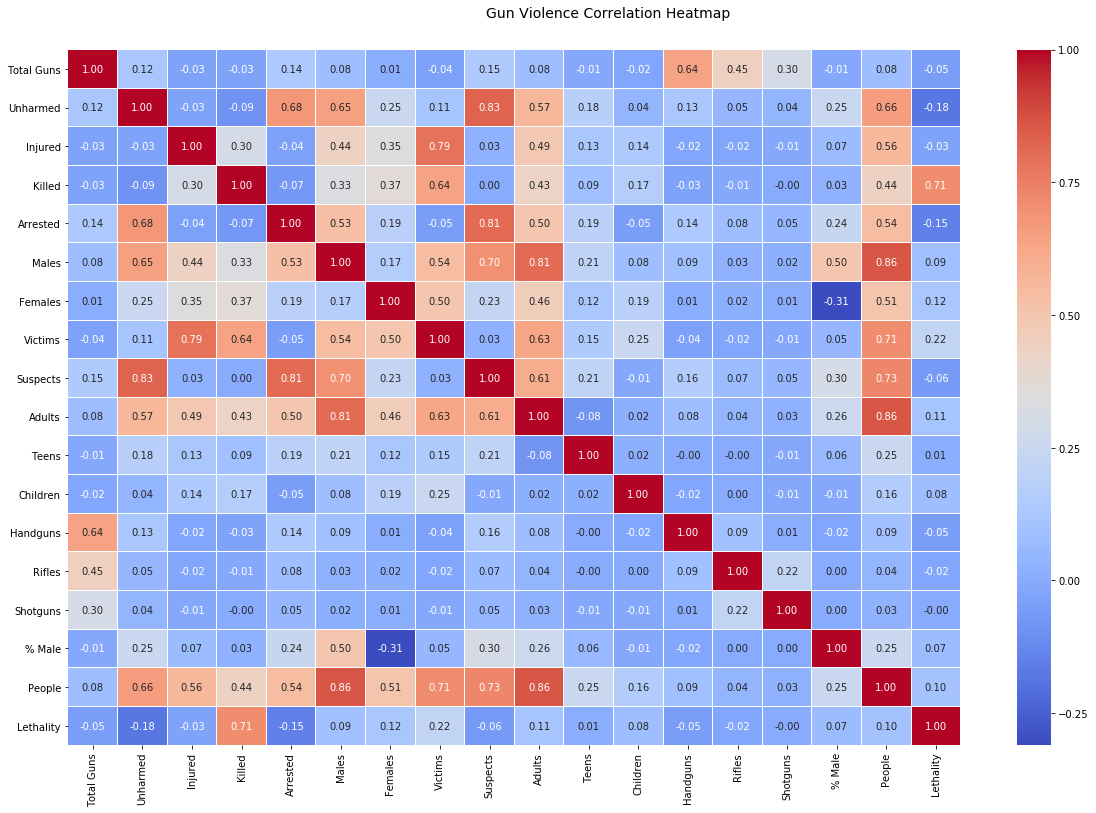

In [406]:
import matplotlib.pyplot as plt
import seaborn as sns

# how features correlate with each other
f, ax = plt.subplots(figsize=(20, 12))
corr = leth_f.corr()
heatmap = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Gun Violence Correlation Heatmap', fontsize=14)
heatmap